In [ ]:
import sys
import numpy
import pandas as pd
import matplotlib
import seaborn
import scipy
import sklearn

print('Python {}'.format(sys.version))
print('Numpy {}'.format(numpy.__version__))
print('Pandas {}'.format(pandas.__version__))
print('Seaborn {}'.format(seaborn.__version__))
print('Scipy {}'.format(scipy.__version__))
print('Sklearn {}'.format(sklearn.__version__))

Python 3.8.3 (default, Jul  2 2020, 11:26:31) 
[Clang 10.0.0 ]
Numpy 1.18.5
Pandas 1.0.5
Seaborn 0.10.1
Scipy 1.5.0
Sklearn 0.23.1


In [ ]:
# import the neccessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

# Load the dataset from the csv file using pandas
import pandas as pd
data = pd.read_csv('creditcard.csv')
data.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
print(data.shape)

(284807, 31)


In [ ]:
print(data.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.919560e-15  5.688174e-16 -8.769071e-15  2.782312e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552563e-15  2.010663e-15 -1.694249e-15 -1.927028e-16 -3.137024e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [ ]:
data = data.sample(frac = 0.1, random_state = 1)
print(data.shape)

(2848, 31)


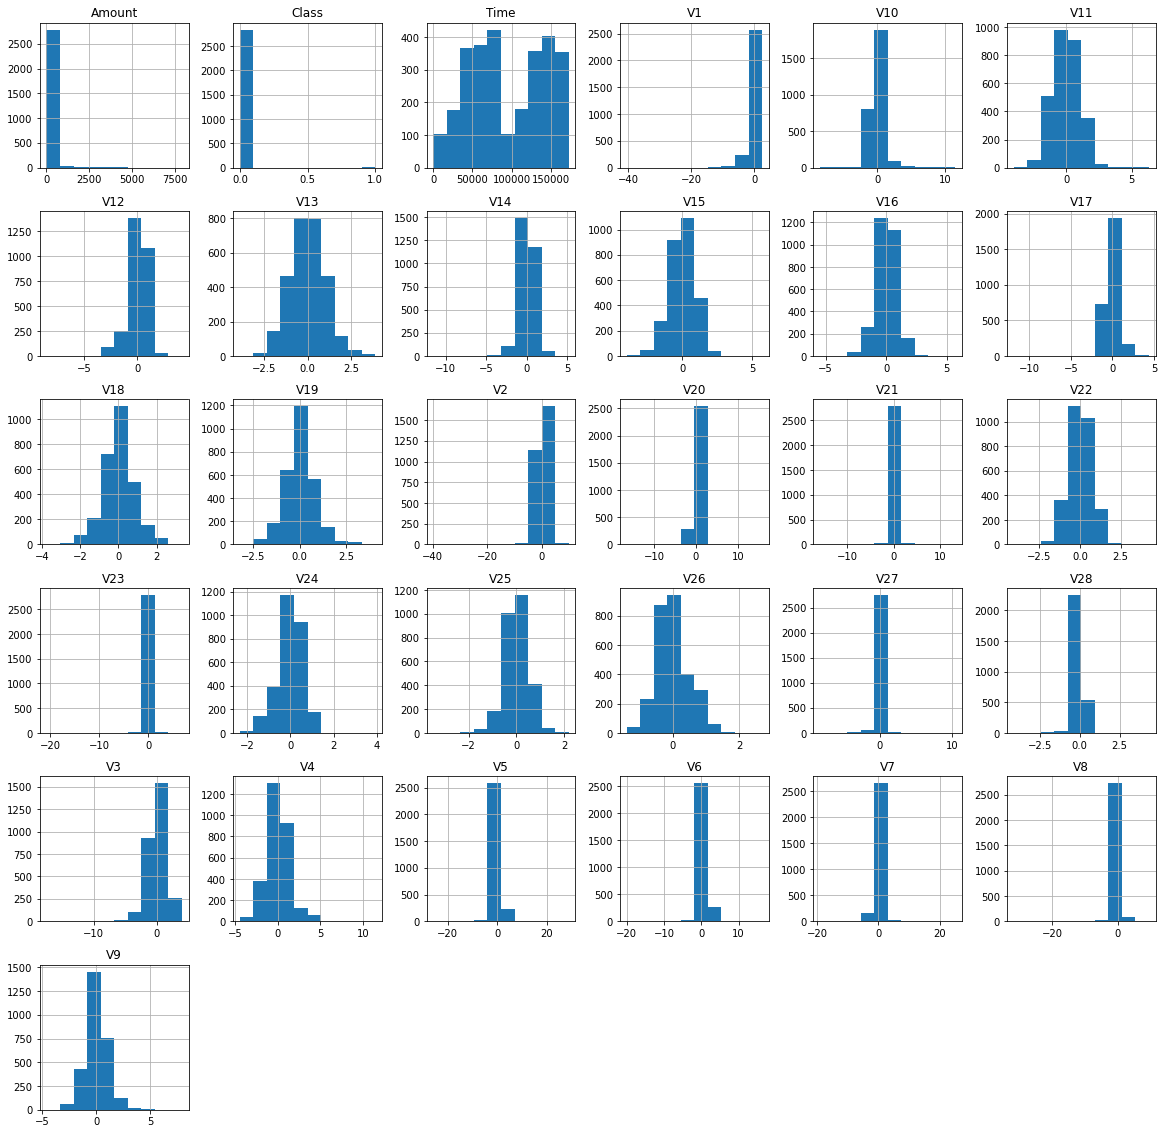

In [ ]:
#Plot histogram of each parameter
data.hist(figsize = (20,20))
plt.show()

In [ ]:
# Determine number of fraud cases in dataset
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]

outlier_fraction = len(fraud)/float(len(valid))
print(outlier_fraction)
print('Fraud Cases: {}'.format(len(fraud)))
print('Valid Cases: {}'.format(len(valid)))

0.0017587055926837848
Fraud Cases: 5
Valid Cases: 2843


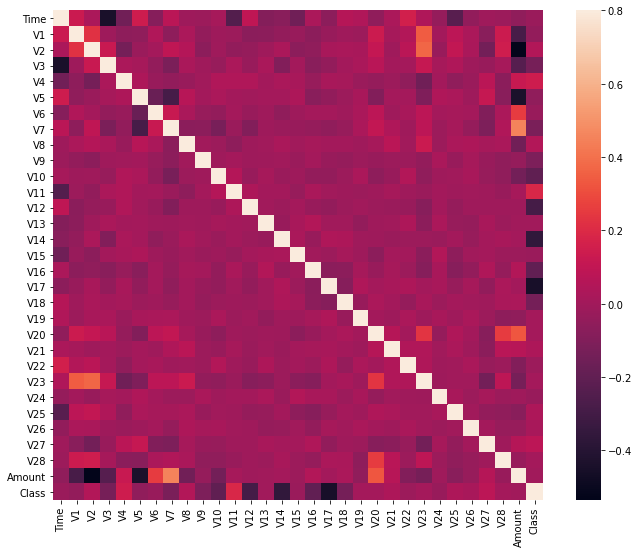

In [ ]:
#correlation matrix
corrmat = data.corr()
fig = plt.figure(figsize = (12,9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [ ]:
#Get all the columns from the DataFrame
columns = data.columns.tolist()

#Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Class"]]

#Store the variable we'll be predicting on
target = "Class"
x = data[columns]
y = data[target]

#Print the shape of x and y
print(x.shape)
print(y.shape)

(2848, 30)
(2848,)


In [ ]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

#Define a random state
state = 1

#Define the outlier detection methods
classifiers = {
    "Isolation Forest": IsolationForest(max_samples = len(x),
                                        contamination = outlier_fraction,
                                        random_state = state),
    "Local Outlier Factor": LocalOutlierFactor(
    n_neighbors = 20,
    contamination = outlier_fraction)
}

In [ ]:
# Fit the model

n_outliers = len(fraud)

for i, (clf_name, clf) in enumerate(classifiers.items()):
    #fit the data and tag outliers 
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(x)
        scores_pred = clf.negative_outlier_factor_
    else:
        clf.fit(x)
        scores_pred = clf.decision_function(x)
        y_pred = clf.predict(x)
    #Reshape the prediction values to 0 for valid , 1 for fraud
    y_pred[y_pred == 1]  = 0
    y_pred[y_pred == -1] = 1
    
    n_errors = (y_pred != y).sum()
    
    #Run classfication metrics
    print('{}: {}'.format(clf_name, n_errors))
    print(accuracy_score(y, y_pred))
    print(classification_report(y, y_pred))

Isolation Forest: 9
0.9968398876404494
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2843
           1       0.17      0.20      0.18         5

    accuracy                           1.00      2848
   macro avg       0.58      0.60      0.59      2848
weighted avg       1.00      1.00      1.00      2848

Local Outlier Factor: 11
0.9961376404494382
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2843
           1       0.00      0.00      0.00         5

    accuracy                           1.00      2848
   macro avg       0.50      0.50      0.50      2848
weighted avg       1.00      1.00      1.00      2848

